In [0]:
from google.colab import files
files.upload()

Saving Copy of Data_Test.csv to Copy of Data_Test.csv
Saving Copy of Data_Train.csv to Copy of Data_Train.csv


{'Copy of Data_Test.csv': b'Restaurant,Location,Cuisines,Cuisines0,Cuisines1,Cuisines2,Cuisines3,Average_Cost,Minimum_Order,Rating,Votes,Reviews\r\nID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",North,Indian,Chinese,Assamese,350,50,4.2,361,225\r\nID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",Biryani,Kebab,,,100,50,NEW,,\r\nID_4620,"Sector 1, Noida",Fast Food,Fast,Food,,,100,50,3.6,36,16\r\nID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, South Indian",Mithai,North,Indian,Chinese,200,50,3.6,66,33\r\nID_3249,"Sector 1, Noida","Chinese, Fast Food",Chinese,Fast,Food,,150,50,2.9,38,14\r\nID_506,"Yerawada, Pune, Maharashtra","North Indian, Chinese",North,Indian,Chinese,,100,50,3.4,16,11\r\nID_8321,"Raja Bazar, Kolkata","South Indian, Fast Food",South,Indian,Fast,Food,200,50,3.3,72,10\r\nID_4559,"Sector 3, Marathalli","Kerala, South Indian, Chinese",Kerala,South,Indian,Chinese,150,50,3.8,46,29\r\nID_

In [0]:
!unzip Participants-Data-20191108T095009Z-001.zip

Archive:  Participants-Data-20191108T095009Z-001.zip
  inflating: Participants Data/Sample_Submission.xlsx  
  inflating: Participants Data/Data_Test.xlsx  
  inflating: Participants Data/Data_Train.xlsx  


In [0]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
train = pd.read_excel('Participants Data/Data_Train.xlsx')
test = pd.read_excel('Participants Data/Data_Test.xlsx')

In [0]:
train.shape, test.shape

((11094, 9), (2774, 8))

In [0]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [0]:
train.head()


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


In [0]:

train.nunique()

Restaurant       7480
Location           35
Cuisines         2179
Average_Cost       26
Minimum_Order      18
Rating             33
Votes            1103
Reviews           761
Delivery_Time       7
dtype: int64

In [0]:
train = train[train['Delivery_Time'] != '10 minutes']
train.shape

(11090, 9)

In [0]:
df = train.append(test,ignore_index=True, sort=False)
df.shape


(13864, 9)

In [0]:
df.head(2)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes


In [0]:
df['Restaurant'] = df['Restaurant'].astype('category')

In [0]:
df['Cuisines'] = df['Cuisines'].str.replace('Poké','Poke')
df['Cuisines'] = df['Cuisines'].str.replace('Coffee','Tea')
df['Cuisines'] = df['Cuisines'].str.replace('Hyderabadi','Biryani')

cuisines_list = df['Cuisines'].str.split(', ')

from collections import Counter
cuisines_counter = Counter(([a for b in cuisines_list.tolist() for a in b]))

for cuisine in cuisines_counter.keys():
    df[cuisine] = 0
    df.loc[df['Cuisines'].str.contains(cuisine), cuisine] = 1

In [0]:
df['Location'] = df['Location'].str.replace('Sector 63A,Gurgaon', 'Sector 63A, Gurgaon') 
df['Location'] = df['Location'].str.replace('BTM Layout,Bangalore', 'BTM Layout, Bangalore')
df['Location'] = df['Location'].str.replace('Majestic', 'Majestic, Bangalore')

location_list = df['Location'].str.split(', ') 

from collections import Counter
location_counter = Counter(([a for b in location_list.tolist() for a in b]))

for loc in location_counter.keys():
    df[loc] = 0
    df.loc[df['Location'].str.contains(loc), loc] = 1

In [0]:

df['Average_Cost'] = df['Average_Cost'].str.replace('for','-999')
df['Average_Cost'] = df['Average_Cost'].str.replace(',','')
df['Average_Cost'] = df['Average_Cost'].str.replace('₹','').astype(float)
df['Average_Cost'] = df['Average_Cost'].replace('-999',np.NaN)

In [0]:
df['Minimum_Order'] = df['Minimum_Order'].str.replace('₹','').astype(float)

In [0]:
df['Rating1'] = df['Rating'].str.replace('-','-999')
df['Rating1'] = df['Rating1'].str.replace('NEW','-999')
df['Rating1'] = df['Rating1'].str.replace('Opening Soon','-999')
df['Rating1'] = df['Rating1'].str.replace('Temporarily Closed','-999')
df['Rating1'] = df['Rating1'].astype(float)
df['Rating1'] = df['Rating1'].replace(-999,np.NaN)

agg_func = {
    'Rating1': ['mean','median','min','max','sum']
}
agg_restaurant = df.groupby('Restaurant').agg(agg_func)
agg_restaurant.columns = [ 'Restaurant_' + ('_'.join(col).strip()) for col in agg_restaurant.columns.values]
agg_restaurant.reset_index(inplace=True)
df = df.merge(agg_restaurant, on=['Restaurant'], how='left')

In [0]:
df['Cat_Rating1'] = pd.qcut(df['Rating1'],q=5,labels=False)

In [0]:
df['Rating'] = df['Rating'].astype('category')

In [0]:
df['Votes'] = df['Votes'].str.replace('-','-999')
df['Votes'] = df['Votes'].astype(float)
df['Votes'] = df['Votes'].replace(-999,np.NaN)

In [0]:
df['Reviews'] = df['Reviews'].str.replace('-','-999')
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'] = df['Reviews'].replace(-999,np.NaN)

In [0]:
calc = df.groupby(['Restaurant'], axis=0).agg({'Restaurant':[('op1', 'count')]}).reset_index() 
calc.columns = ['Restaurant','Restaurant Count']
df = df.merge(calc, on=['Restaurant'], how='left')

In [0]:
agg_func = {
    'Votes': ['mean','median','min','max','sum'],
    'Reviews': ['mean','median','min','max','sum']
    
}
agg_restaurant = df.groupby('Restaurant').agg(agg_func)
agg_restaurant.columns = [ 'Restaurant_' + ('_'.join(col).strip()) for col in agg_restaurant.columns.values]
agg_restaurant.reset_index(inplace=True)
df = df.merge(agg_restaurant, on=['Restaurant'], how='left')

In [0]:

df.drop(['Cuisines','Location','Rating1'], axis=1, inplace=True)

In [0]:
train_df = df[df['Delivery_Time'].isnull()!=True]
test_df = df[df['Delivery_Time'].isnull()==True]
test_df.drop(['Delivery_Time'], axis=1, inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Delivery_Time'] = le.fit_transform(train_df['Delivery_Time'])
le.classes_



array(['120 minutes', '20 minutes', '30 minutes', '45 minutes',
       '65 minutes', '80 minutes'], dtype=object)

In [0]:
train_df.shape, test_df.shape


((11090, 188), (2774, 187))

In [0]:
train_df.tail(2)

,Restaurant,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Fast Food,Rolls,Burger,Salad,Wraps,Ice Cream,Desserts,Italian,Street Food,Mughlai,North Indian,Chinese,Cafe,Beverages,South Indian,Thai,Asian,Mithai,Momos,Indonesian,Biryani,Kerala,Bihari,Mexican,Japanese,Bakery,Burmese,Bubble Tea,Tea,Pizza,Lucknowi,Mangalorean,European,Continental,Sandwich,Healthy Food,Bengali,American,Mishti,Andhra,Assamese,Maharashtrian,German,Arabian,Finger Food,Kebab,Chettinad,Seafood,Juices,Parsi,Sushi,Odia,Tamil,Cantonese,North Eastern,Tibetan,Lebanese,Spanish,Bar Food,Konkan,Paan,Steak,Mediterranean,Bohri,Afghan,Goan,Gujarati,BBQ,Raw Meats,Malaysian,Vietnamese,Sri Lankan,Rajasthani,Poke,Roast Chicken,Brazilian,Belgian,Naga,Korean,Modern Indian,Awadhi,Kashmiri,French,Portuguese,Charcoal Chicken,Frozen Yogurt,Bangladeshi,Malwani,Iranian,Nepalese,Indian,Tex-Mex,Hot dogs,South American,Middle Eastern,African,Turkish,Israeli,Greek,FTI College,Law College Road,Pune,Sector 3,Marathalli,Mumbai Central,Sector 1,Noida,Rmz Centennial,I Gate,Whitefield,Delhi University-GTB Nagar,Yerawada,Maharashtra,Delhi Administration Flats,Timarpur,Moulali,Kolkata,Dockyard Road,Mumbai CST Area,Pune University,Gora Bazar,Rajbari,North Dumdum,D-Block,Sector 63,Sector 14,Mico Layout,Stage 2,BTM Layout,Bangalore,Laxman Vihar Industrial Area,Sector 3A,Gurgoan,Tiretti,Sandhurst Road,MG Road,Hyderabad Public School,Begumpet,Majestic,Chandni Chowk,Delhi High Court,India Gate,Chatta Bazaar,Malakpet,Hyderabad,Sector 63A,Gurgaon,Delhi Cantt.,Tejas Nagar Colony,Wadala West,Mumbai,Babarpur,New Delhi,Delhi,Nathan Road,Mangaldas Road,Panjetan Colony,Raja Bazar,Jaya Nagar,Saidabad,Noorkhan Bazaar,Musi Nagar,BTM Layout 1,Electronic City,Restaurant_Rating1_mean,Restaurant_Rating1_median,Restaurant_Rating1_min,Restaurant_Rating1_max,Restaurant_Rating1_sum,Cat_Rating1,Restaurant Count,Restaurant_Votes_mean,Restaurant_Votes_median,Restaurant_Votes_min,Restaurant_Votes_max,Restaurant_Votes_sum,Restaurant_Reviews_mean,Restaurant_Reviews_median,Restaurant_Reviews_min,Restaurant_Reviews_max,Restaurant_Reviews_sum
11088,ID_4115,100.0,50.0,3.1,24.0,9.0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.1,3.1,3.1,3.1,3.1,0.0,1,24.0,24.0,24.0,24.0,24.0,9.0,9.0,9.0,9.0,9.0
11089,ID_4417,100.0,50.0,NEW,NaN,NaN,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0


In [0]:
X = train_df.drop(labels=['Delivery_Time'], axis=1)
y = train_df['Delivery_Time'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [0]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((8320, 11), (8320,), (2774, 11), (2774,))

In [0]:
categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [0]:

from math import sqrt 
from sklearn.metrics import accuracy_score

In [0]:
!pip install catboost

In [0]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        cat_features=categorical_features_indices,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

CatBoostError: ignored

In [0]:
predictions = cat.predict(X_cv)
print('accuracy:', accuracy_score(y_cv, predictions))

accuracy: 0.8283447529751172


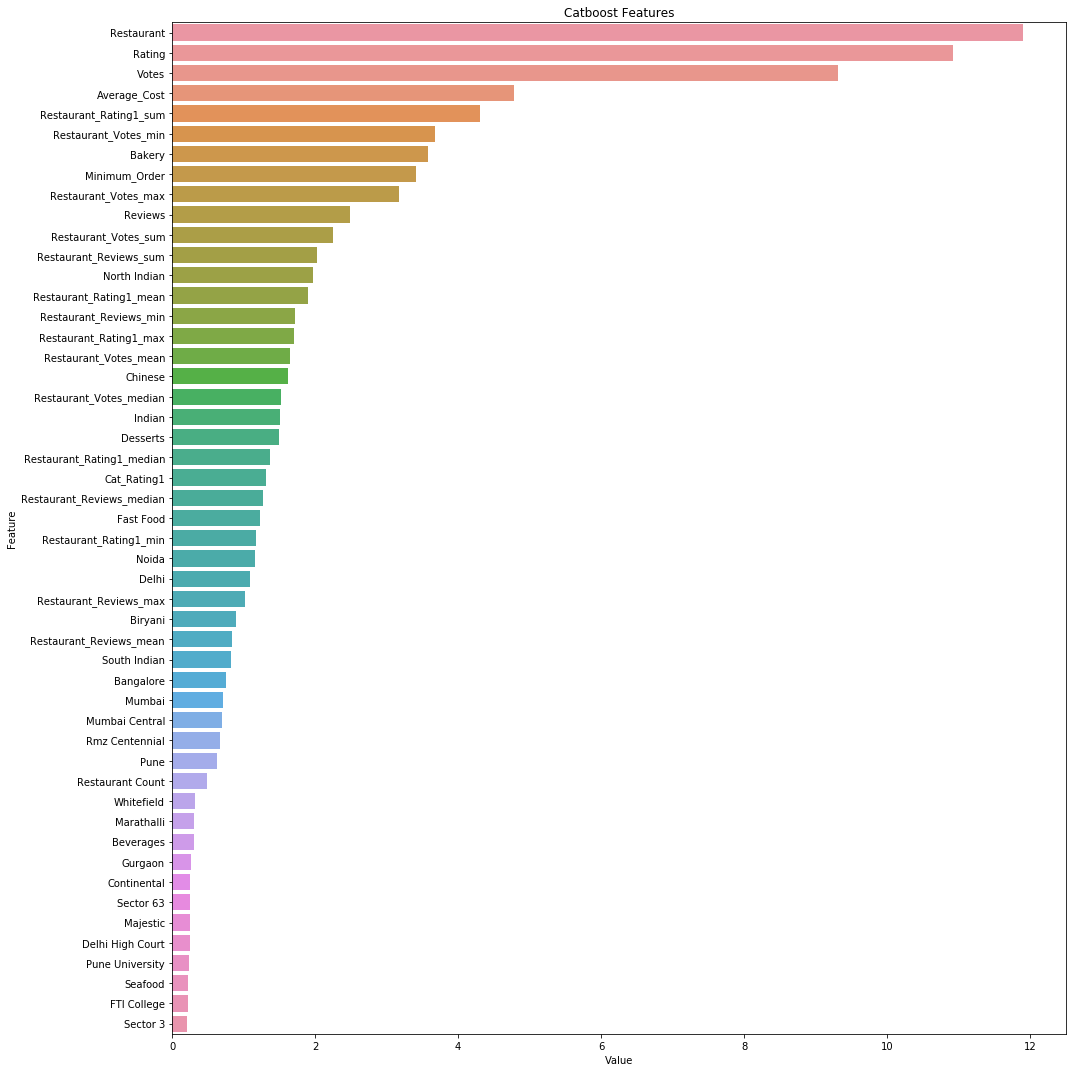

In [0]:
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test_df

In [0]:
from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

Accuracy:  0.8196573489630298
Accuracy:  0.7917042380522994
Accuracy:  0.8322813345356177
Accuracy:  0.8232642019837692
Accuracy:  0.842200180342651
Accuracy:  0.8268710550045085
Accuracy:  0.8376916140667268
Accuracy:  0.824165915238954
Accuracy:  0.8431018935978359
Accuracy:  0.8196573489630298


In [0]:
np.mean(errcat,0)

0.8260595130748423

In [0]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
cat_final

array([[2],
       [2],
       [2],
       ...,
       [3],
       [2],
       [4]])

In [0]:
y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=y_pred_class, columns=['Delivery_Time'])
df_sub.head()

,Delivery_Time
0,30 minutes
1,30 minutes
2,30 minutes
3,30 minutes
4,30 minutes


In [0]:
df_sub['Delivery_Time'].value_counts()

30 minutes     2037
45 minutes      615
65 minutes      115
120 minutes       5
20 minutes        1
80 minutes        1
Name: Delivery_Time, dtype: int64

In [0]:
!pip install xlsxwriter

     |████████████████████████████████| 143kB 4.9MB/s 


In [0]:
writer = pd.ExcelWriter('aakash.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

**2nd**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
test = pd.read_csv('Copy of Data_Test.csv', encoding = 'unicode_escape')
train = pd.read_csv('Copy of Data_Train.csv', encoding = 'unicode_escape')

In [0]:
train.head(15)

,Restaurant,Location,Cuisines,Cuisines0,Cuisines1,Cuisines2,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",Fast,Food,Rolls,200,50,3.5,12.0,4.0,30
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",Ice,Cream,Desserts,100,50,3.5,11.0,4.0,30
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",Italian,Street,Food,150,50,3.6,99.0,30.0,65
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",Mughlai,North,Indian,250,99,3.7,176.0,95.0,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",Cafe,Beverages,NaN,200,99,3.2,521.0,235.0,65
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",South,Indian,North,150,50,3.8,46.0,18.0,30
6,ID_3777,Mumbai Central,"Beverages, Fast Food",Beverages,Fast,Food,150,50,3.7,108.0,31.0,30
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",Chinese,Thai,Asian,650,50,4,1731.0,1235.0,45
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",Mithai,Street,Food,100,50,3.9,110.0,26.0,30
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",Fast,Food,North,200,50,3.9,562.0,294.0,65


In [0]:
test.head(5)

,Restaurant,Location,Cuisines,Cuisines0,Cuisines1,Cuisines2,Cuisines3,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",North,Indian,Chinese,Assamese,350,50,4.2,361.0,225.0
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",Biryani,Kebab,NaN,NaN,100,50,NEW,NaN,NaN
2,ID_4620,"Sector 1, Noida",Fast Food,Fast,Food,NaN,NaN,100,50,3.6,36.0,16.0
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",Mithai,North,Indian,Chinese,200,50,3.6,66.0,33.0
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",Chinese,Fast,Food,NaN,150,50,2.9,38.0,14.0


In [0]:
train.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Cuisines0           0
Cuisines1        1175
Cuisines2        3903
Average_Cost        0
Minimum_Order       0
Rating           1191
Votes            2074
Reviews          2312
Delivery_Time       0
dtype: int64

In [0]:
test.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Cuisines0           0
Cuisines1         312
Cuisines2         994
Cuisines3        1734
Average_Cost        0
Minimum_Order       0
Rating            305
Votes             542
Reviews           593
dtype: int64

In [0]:
del test['Cuisines3']

In [0]:
train['Cuisines1']=train['Cuisines1'].fillna(train['Cuisines0'])

In [0]:
train['Cuisines2']=train['Cuisines2'].fillna(train['Cuisines1'])

In [0]:
test['Cuisines1']=test['Cuisines1'].fillna(test['Cuisines0'])

In [0]:
test['Cuisines2']=test['Cuisines2'].fillna(test['Cuisines1'])

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,11094
Total Missing (%),2.5%
Total size in memory,1.0 MiB
Average record size in memory,96.0 B
Numeric,3
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [0]:
train['Rating'].unique(),test['Rating'].unique()

(array(['3.5', '3.6', '3.7', '3.2', '3.8', '4', '3.9', '4.2', nan, '2.8',
        '3', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6', '4.3',
        '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5', 'Opening Soon',
        '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'], dtype=object),
 array(['4.2', 'NEW', '3.6', '2.9', '3.4', '3.3', '3.8', '3.2', '3.1',
        '4.1', '3.9', nan, '3.7', '4', '4.3', '3', '3.5', '2.6', '2.8',
        '4.5', '2.7', '4.4', '2.1', '2.4', '4.7', '4.6', '2.5', '4.8',
        '2.3', 'Opening Soon'], dtype=object))

In [0]:
train['Rating']=train['Rating'].fillna(method ='pad') 
test['Rating']=test['Rating'].fillna(method ='pad') 

In [0]:
loc = np.append(train['Rating'].values, test['Rating'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Rating']=l.transform(train['Rating'])
test['Rating']=l.transform(test['Rating'])

In [0]:
train['Votes'].value_counts()

4.0       248
6.0       200
7.0       182
9.0       181
5.0       176
         ... 
3404.0      1
1291.0      1
1137.0      1
450.0       1
967.0       1
Name: Votes, Length: 1102, dtype: int64

In [0]:
train['Rating'].mean()

16.220479538489272

In [0]:
train['Votes']=train['Votes'].fillna(method ='pad') 
test['Votes']=test['Votes'].fillna(method ='pad') 

In [0]:
train['Votes'].value_counts()

4.0       317
6.0       247
9.0       231
7.0       227
5.0       217
         ... 
259.0       1
290.0       1
1537.0      1
2340.0      1
967.0       1
Name: Votes, Length: 1102, dtype: int64

In [0]:
train['Reviews'].value_counts()

2.0       420
3.0       387
1.0       381
4.0       356
5.0       256
         ... 
219.0       1
1845.0      1
1263.0      1
430.0       1
2567.0      1
Name: Reviews, Length: 760, dtype: int64

In [0]:
train['Reviews'].mean()

123.24789341835573

In [0]:
train['Reviews']=train['Reviews'].fillna(method ='pad')
test['Reviews']=test['Reviews'].fillna(method ='pad')

In [0]:
train.dtypes,test.dtypes

(Restaurant        object
 Location          object
 Cuisines          object
 Cuisines0         object
 Cuisines1         object
 Cuisines2         object
 Average_Cost      object
 Minimum_Order      int64
 Rating             int64
 Votes            float64
 Reviews          float64
 Delivery_Time      int64
 dtype: object, Restaurant        object
 Location          object
 Cuisines          object
 Cuisines0         object
 Cuisines1         object
 Cuisines2         object
 Average_Cost      object
 Minimum_Order      int64
 Rating             int64
 Votes            float64
 Reviews          float64
 dtype: object)

In [0]:
loc = np.append(train['Location'].values, test['Location'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Location']=l.transform(train['Location'])
test['Location']=l.transform(test['Location'])

In [0]:
loc = np.append(train['Cuisines0'].values, test['Cuisines0'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Cuisines0']=l.transform(train['Cuisines0'])
test['Cuisines0']=l.transform(test['Cuisines0'])

In [0]:
loc = np.append(train['Cuisines1'].values, test['Cuisines1'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Cuisines1']=l.transform(train['Cuisines1'])
test['Cuisines1']=l.transform(test['Cuisines1'])

In [0]:
loc = np.append(train['Cuisines2'].values, test['Cuisines2'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Cuisines2']=l.transform(train['Cuisines2'])
test['Cuisines2']=l.transform(test['Cuisines2'])

In [0]:
loc = np.append(train['Cuisines'].values, test['Cuisines'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Cuisines']=l.transform(train['Cuisines'])
test['Cuisines']=l.transform(test['Cuisines'])

In [0]:
train['Average_Cost']=train['Average_Cost'].str.replace(',', '')
test['Average_Cost']=test['Average_Cost'].str.replace(',', '')


In [0]:
a=[]
for i in train['Average_Cost']:
  if i=='for':
    a.append(200)
  else:
    a.append(i)
train['Average_Cost']=a

In [0]:
a=[]
for i in test['Average_Cost']:
  if i=='for':
    a.append(200)
  else:
    a.append(i)
test['Average_Cost']=a

In [0]:
train['Average_Cost']=train['Average_Cost'].astype(int)
test['Average_Cost']=test['Average_Cost'].astype(int)

In [0]:
train['Delivery_Time'].unique()

array([ 30,  65,  45,  10,  20, 120,  80])

In [0]:
train['Delivery_Time']=train['Delivery_Time']//5

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

X_train = train.drop("Delivery_Time", axis=1)
X_train = X_train.drop("Restaurant", axis=1)
Y_train = train["Delivery_Time"].values
X_test = test.drop("Restaurant", axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
X_train.shape, Y_train.shape, X_test.shape

((11094, 10), (11094,), (2774, 10))

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
#Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_log = round(linreg.score(X_train, Y_train) * 100, 2)
acc_log

11.25

In [0]:
#Support Vector Machines (SVM)
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

66.92

In [0]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.02

In [0]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.02

In [0]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

53.34

In [0]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

68.79

In [0]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

68.19

In [0]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [0]:
a=Y_pred

In [0]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.99

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

14.3

In [0]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [0]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
abc = AdaBoostClassifier(n_estimators=100, random_state= 1, learning_rate=0.01)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=1, learning_rate=0.01)
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.01, random_state=1)

In [0]:
rfc.fit(X_train, Y_train)
abc.fit(X_train, Y_train)
gbc.fit(X_train, Y_train)
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
Y_pred = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train, Y_train) * 100, 2)
acc_rfc

100.0

In [0]:
Y_pred = abc.predict(X_test)
acc_abc = round(abc.score(X_train, Y_train) * 100, 2)
acc_abc

66.76

In [0]:
Y_pred = gbc.predict(X_test)
acc_gbc = round(gbc.score(X_train, Y_train) * 100, 2)
acc_gbc

69.24

In [0]:
Y_pred = xgb_clf.predict(X_test)
acc_xgb = round(xgb_clf.score(X_train, Y_train) * 100, 2)
acc_xgb

69.24

In [0]:
p=[]
for i in Y_pred:
  i=i*5
  i=str(i)+' '+'minutes'
  p.append(i)

In [0]:
Y_pred =np.array(p).tolist()

y_pred = np.array(Y_pred)

In [0]:
models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Linear Regression', 'Random Forest', 'Naive Bayes', 'Perceptron',
                  'Stochastic Gradient Descent', 'Linear SVC', 'Decision Tree'],
        'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,79.02
7,Linear SVC,68.79
6,Stochastic Gradient Descent,68.03
0,Support Vector Machines,66.92
5,Perceptron,53.34
4,Naive Bayes,14.30
2,Linear Regression,11.25


In [0]:
submission = pd.DataFrame({
        "Restaurant": test["Restaurant"],
        "Delivery_Time": Y_pred
    })
submission.to_csv('./submission.csv', index=False)
print(submission.head(10))

  Restaurant Delivery_Time
0    ID_2842    30 minutes
1     ID_730    30 minutes
2    ID_4620    30 minutes
3    ID_5470    30 minutes
4    ID_3249    30 minutes
5     ID_506    30 minutes
6    ID_8321    45 minutes
7    ID_4559    30 minutes
8    ID_7982    30 minutes
9    ID_2869    30 minutes


In [0]:
from google.colab import files
files.download('submission.xlsx')